In [1]:
import shared_methods as shared_methods
import importlib
importlib.reload(shared_methods)
from shared_methods import Config

from IPython.display import Markdown

In [2]:

config = Config({'expiration': '26MAR21',
        'strikes' : [
            '4000', '5000', '6000', '7000', '8000', '9000', '10000', '11000',
            '12000', '13000', '14000', '15000', '16000', '17000', '18000',
            '20000', '24000', '28000', '32000', '36000', '40000', '44000',
            '48000', '52000', '56000'
        ]
         })

In [3]:
display(Markdown(f'## Expiration: **{config.expiration}**'))

## Expiration: **26MAR21**

In [4]:
display(Markdown(f'### Strikes {config.strikes}'))

### Strikes ['4000', '5000', '6000', '7000', '8000', '9000', '10000', '11000', '12000', '13000', '14000', '15000', '16000', '17000', '18000', '20000', '24000', '28000', '32000', '36000', '40000', '44000', '48000', '52000', '56000']

In [5]:
merged_df = shared_methods.getMergedDataframe(config)

startDate = merged_df.iloc[-1]['timestamp'].strftime('%Y-%m-%d')
startPrice = merged_df.iloc[-1]['btc_usd']

endDate = merged_df.iloc[0]['timestamp'].strftime('%Y-%m-%d')
endPrice = merged_df.iloc[0]['btc_usd']


"These strikes don't have any data:"

[]

In [6]:
display(Markdown(f'## Start price at {startDate}: **{startPrice}**'))

## Start price at 2020-06-25: **9239.48**

In [7]:
display(Markdown(f'## End price at {endDate}: **{endPrice}**'))

## End price at 2021-03-26: **55081.37**

In [8]:
display(Markdown(f'## BTC PnL at {endDate}: **{((endPrice / (startPrice / 100)) - 100).round(2)} %**'))

## BTC PnL at 2021-03-26: **496.15 %**

In [9]:
def filter(df):
    #pd.set_option('display.width', 1000)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        strike = 5000
        month = 1
        year = 2023
        result = df.loc[(pd.to_datetime(df['timestamp']).dt.month == month) 
                        & (pd.to_datetime(df['timestamp']).dt.year == year)

                       ]
        result = result.dropna(axis=1, how='all')
#        result = result.loc[:, ['timestamp', 'btc_usd', f'option_{strike}_usd']]

        display(result)

In [10]:

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(merged_df)
#    display(merged_df.loc[:, ['timestamp', 'btc_usd', f'option_5000_usd']].dropna(axis=1, how='all'))
#filter(merged_df)
#display(merged_df)

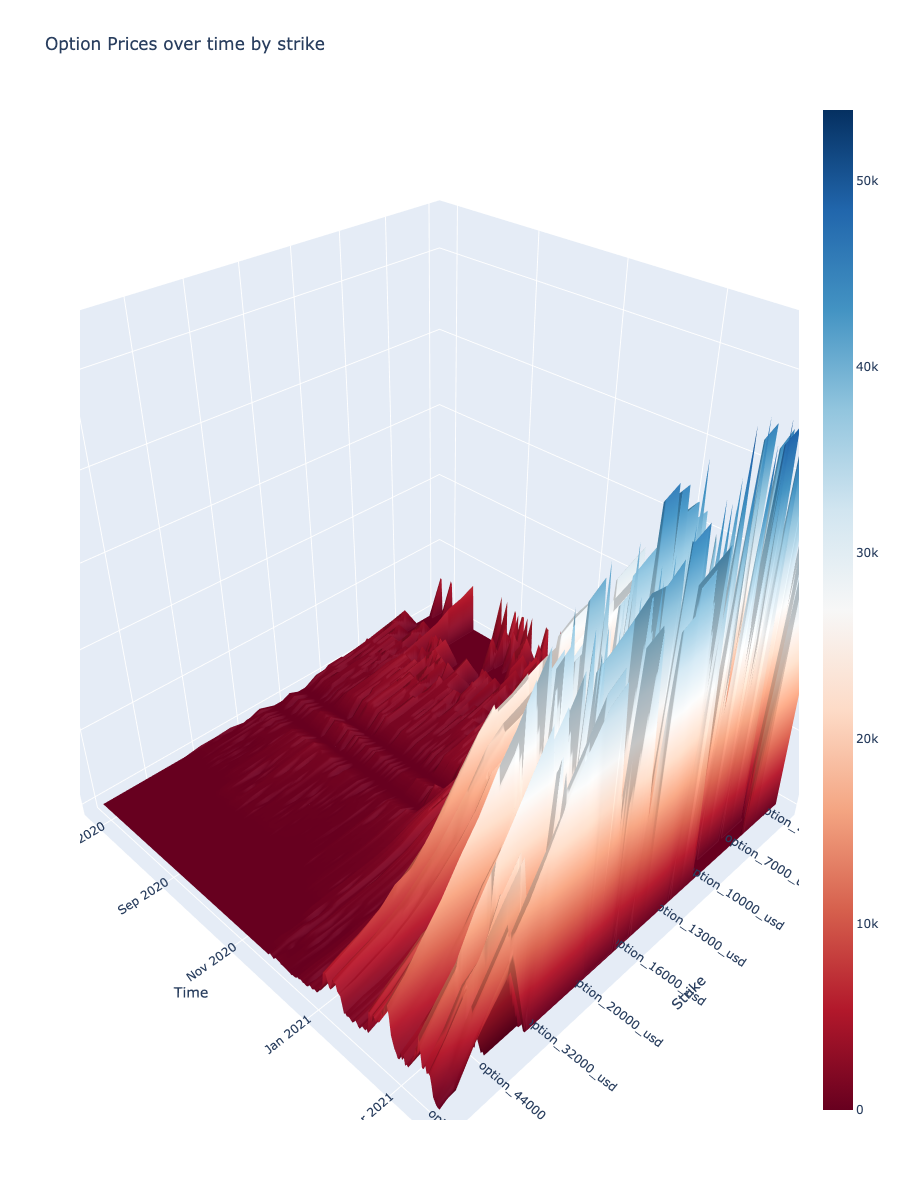

In [11]:


shared_methods.plotSurface(merged_df)

* At the beginning only the out of the money options have been traded.


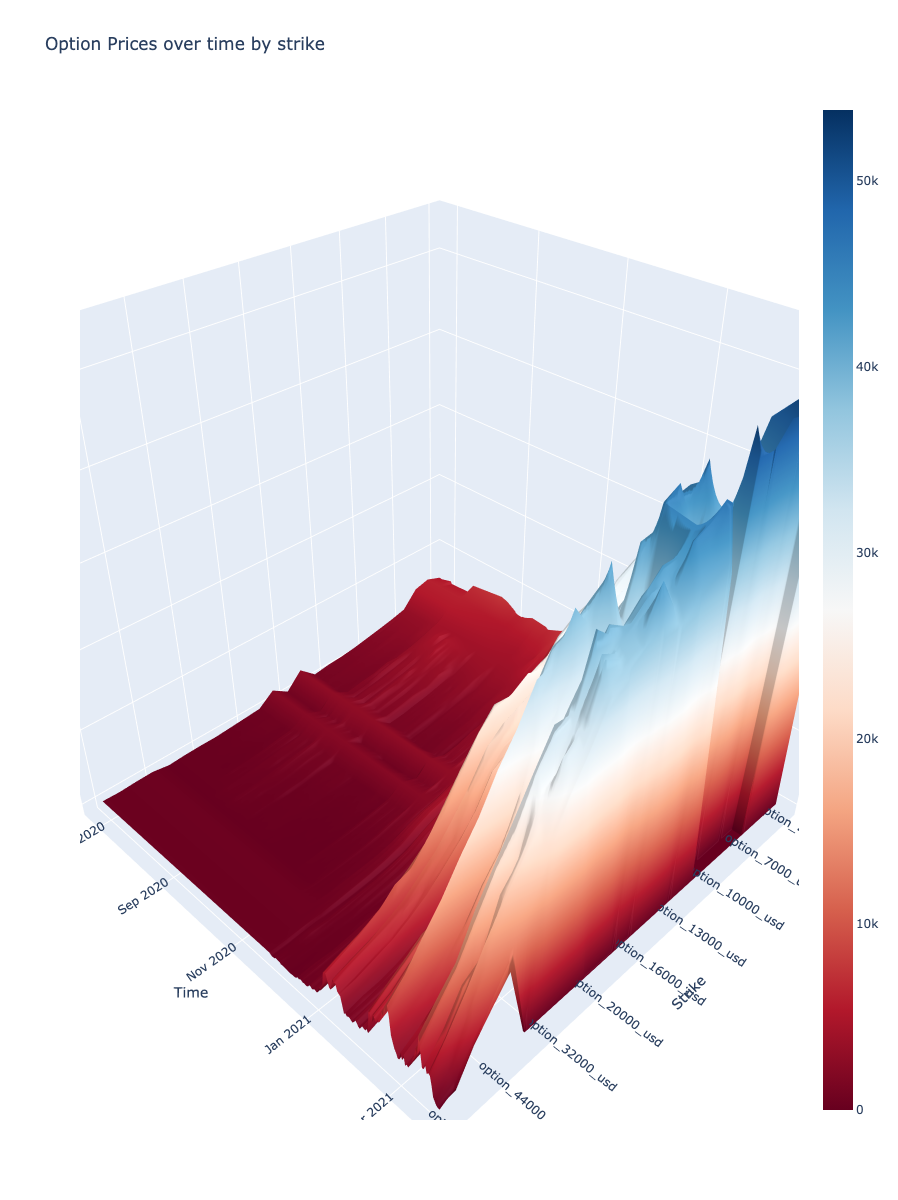

In [12]:
shared_methods.plotSurface(merged_df.interpolate(method='linear')) #cubic vs linear

* Obviously options with a lower strike have more intrinsic value and thus are more pricy.
* As the BTC price declines the option prices decline.
* Soon before expiration the atm options increase the most in fixed dollar terms (not percentage wise)
* Soon before expiration the out of the money options go to zero.
* The options that are way in the money don't move much.

### Show the Plain prices of BTC and the Options

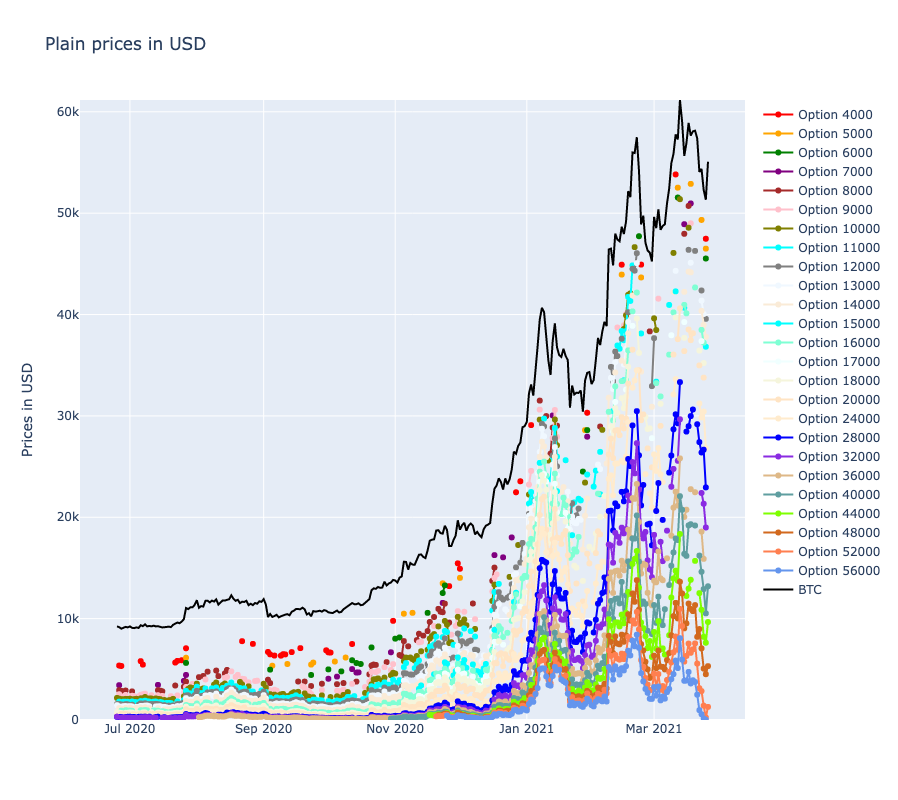

In [13]:

shared_methods.showPlainPriceChart(merged_df, config.strikes)

In [14]:
shared_methods.getTradingViewWidget("Bitstamp:BTCUSD")


### Move the lines up to the same startpoint of BTC to roughly visualize the delta

In [15]:

df_shifted = shared_methods.shiftLinesToTheStartOfBTC(merged_df, config.strikes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(df_shifted)

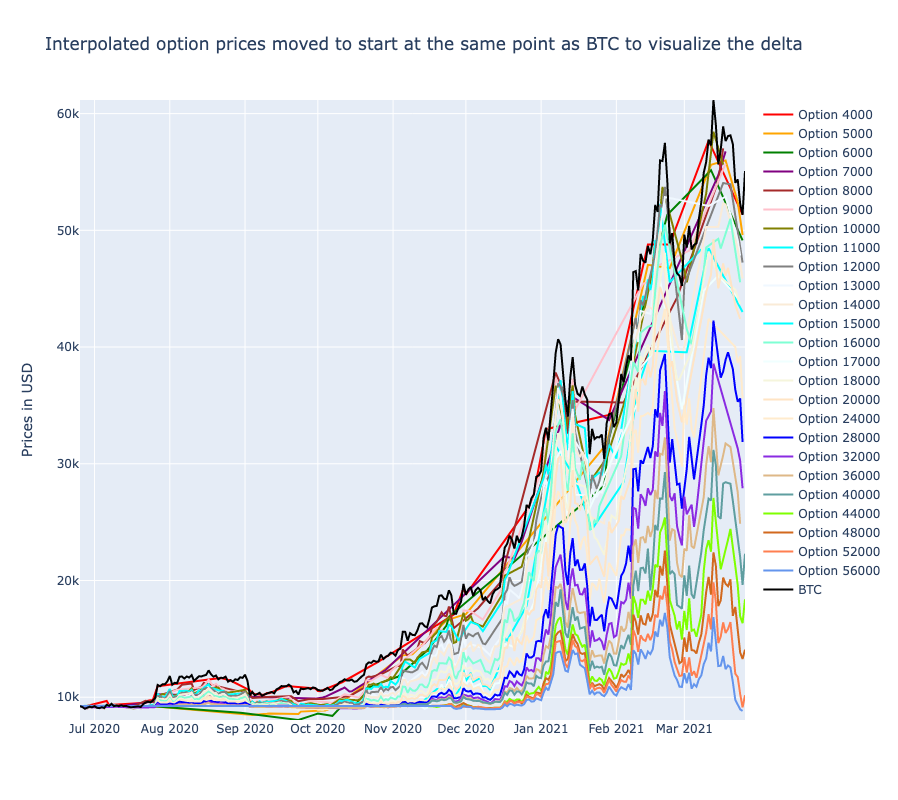

In [16]:
shared_methods.showOffsettedPriceChart(df_shifted, config.strikes)

The more the option is in the money the more it follows the price movements of BTC (=higher delta). But it's interpolated which distorts the picture as there aren't always trades while the line doesn't really show that.

In [17]:
dfPricesChangedUSD = shared_methods.getPriceChanges(merged_df, config.strikes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(dfPricesChangedUSD)

### Absolute changes in USD compared to previous day. The Delta.

Disable the BTC plot in the legend of the chart if it overlays the other plots too much!

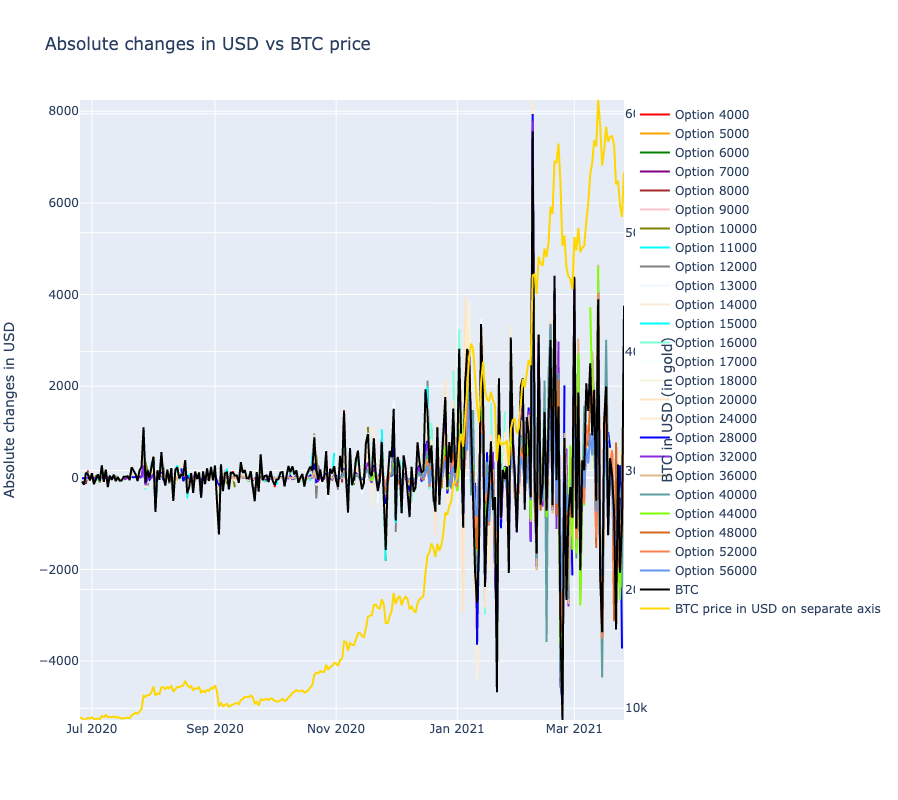

In [18]:
shared_methods.plotOptionPricesChangedUSD(dfPricesChangedUSD, config.strikes)


### Percent changes compared to previous data point relative to the BTC price

#### The out of the money options fluctuate more than the options that are more in the money.

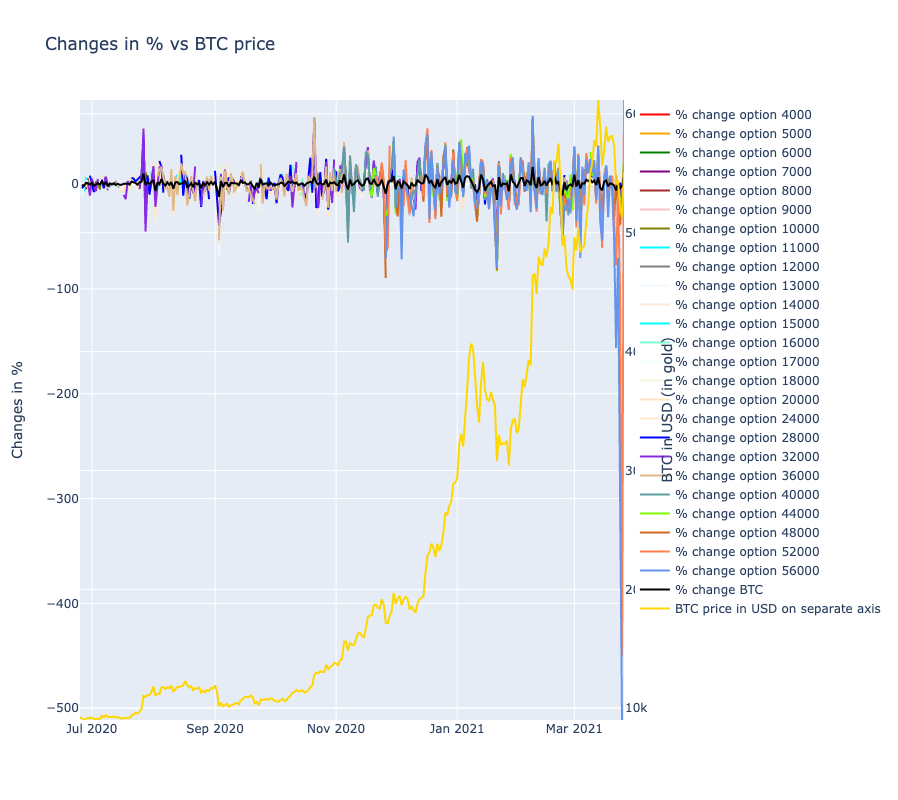

In [19]:
display(Markdown('#### The out of the money options fluctuate more than the options that are more in the money.'))
shared_methods.plotOptionPricesChangedPercent(dfPricesChangedUSD, config.strikes)

## Price increase in %

In [27]:

#interpolated_df = merged_df.interpolate(method='linear') # or cubic
#df_percent_all = shared_methods.calcGains(interpolated_df, config.strikes)
df_percent_all = shared_methods.calcGains(merged_df, config.strikes)

#with pd.option_context('display.max_rows', None):
#    display(df_percent_all)
df_percent_all

timestamp   btc_usd  btc_percent_all  option_4000_usd   
272  2021-03-26  55081.37       496.152273              NaN  \
0    2021-03-25  51326.11       455.508643         47476.65   
238  2021-03-24  52287.52       465.914099              NaN   
34   2021-03-23  54361.57       488.361791              NaN   
260  2021-03-22  54070.92       485.216051              NaN   
..          ...       ...              ...              ...   
103  2020-06-29   9188.88        -0.547650              NaN   
104  2020-06-28   9118.01        -1.314684              NaN   
32   2020-06-27   9009.30        -2.491266          5329.00   
33   2020-06-26   9158.26        -0.879054          5371.32   
180  2020-06-25   9239.48         0.000000              NaN   

     option_4000_percent_all  option_5000_usd  option_5000_percent_all   
272                      NaN              NaN                      NaN  \
0                 783.891669         46501.46               657.145602   
238                      NaN              NaN                      NaN   
34                       NaN         49333.12               703.251228   
260                      NaN              NaN                      NaN   
..                       ...              ...                      ...   
103                      NaN              NaN                      NaN   
104                      NaN              NaN                      NaN   
32                 -0.787888              NaN                      NaN   
33                  0.000000              NaN                      NaN   
180                      NaN              NaN                      NaN   

     option_6000_usd  option_6000_percent_all  option_7000_usd  ...   
272              NaN                      NaN              NaN  ...  \
0           45526.26               708.125945              NaN  ...   
238              NaN                      NaN              NaN  ...   
34               NaN                      NaN              NaN  ...   
260              NaN                      NaN              NaN  ...   
..               ...                      ...              ...  ...   
103              NaN                      NaN              NaN  ...   
104              NaN                      NaN              NaN  ...   
32               NaN                      NaN              NaN  ...   
33               NaN                      NaN          3434.35  ...   
180              NaN                      NaN              NaN  ...   

     option_40000_usd  option_40000_percent_all  option_44000_usd   
272          13191.99               9627.171509           9666.78  \
0            10521.85               7658.332104           7621.93   
238          12915.02               9422.946468           8209.14   
34           14623.26              10682.524701          10872.31   
260          16221.28              11860.831736          12517.42   
..                ...                       ...               ...   
103               NaN                       NaN               NaN   
104               NaN                       NaN               NaN   
32                NaN                       NaN               NaN   
33                NaN                       NaN               NaN   
180               NaN                       NaN               NaN   

     option_44000_percent_all  option_48000_usd  option_48000_percent_all   
272               1766.029650           5315.35               1013.185616  \
0                 1371.301444           4516.70                845.925569   
238               1484.653695           5071.89                962.198161   
34                1998.739480           7067.00               1380.030995   
260               2316.303760           8975.77               1779.781776   
..                        ...               ...                       ...   
103                       NaN               NaN                       NaN   
104                       NaN               NaN               

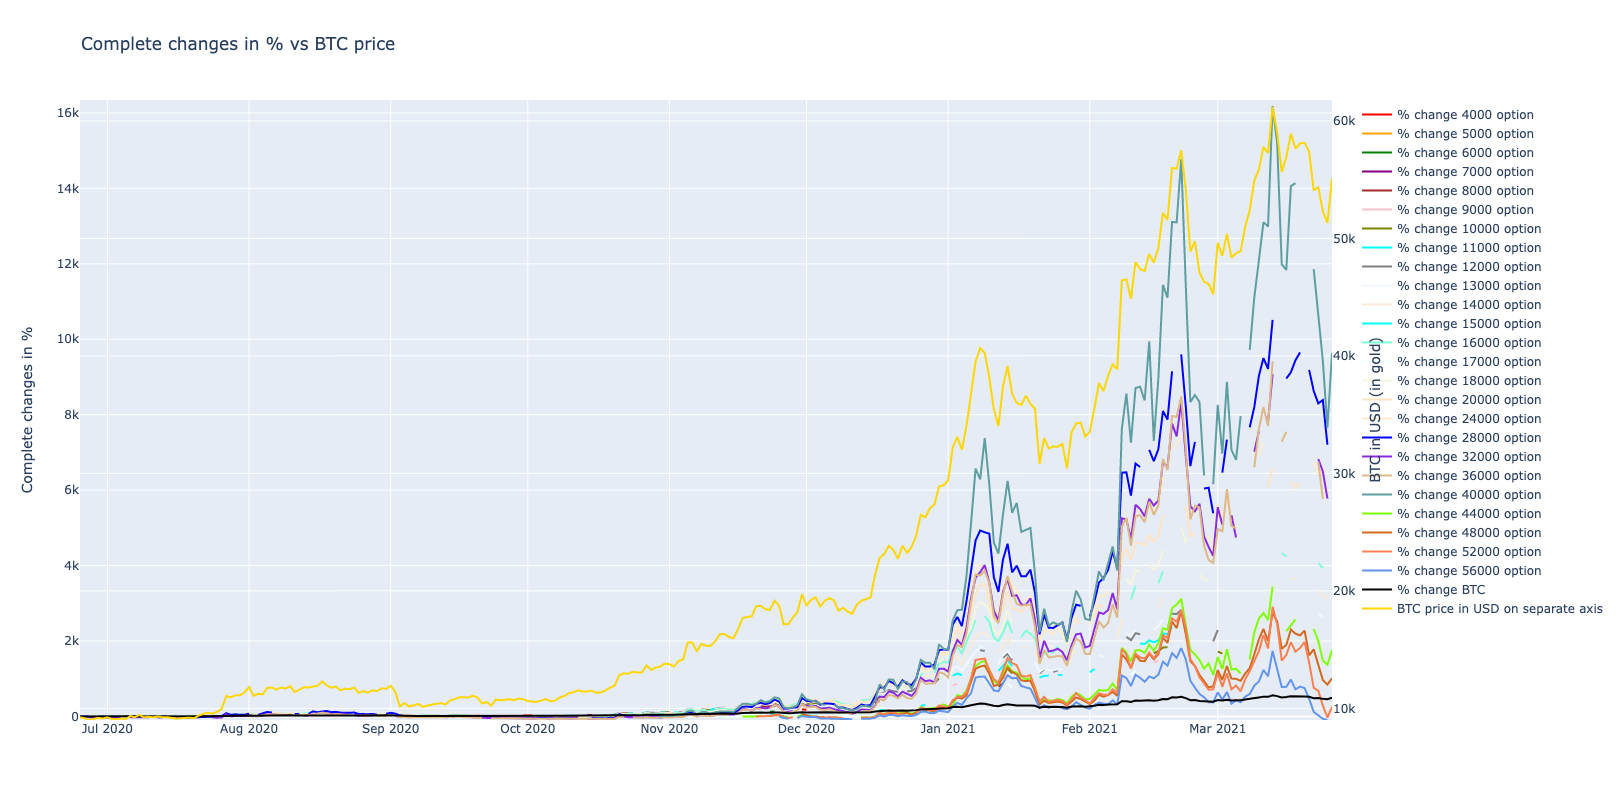

In [29]:
shared_methods.plotOptionPricesChangedPercentAll(df_percent_all, config.strikes)

The OOTM options went to zero pretty soon and even the options that where still ITM at expiration lost a significant amount or most of its value.

* BTC: 5x
* low strikes are rarely traded. Last trades sometime during the bull market:
    * 4k: 1,5x
    * 8k: 8x
    * 9k: 10x
    * 10k: 15x
* 28k: 70x
* 32k: 60x
* 40k: 100x
* 48k: 10x
* 52k: 3x